In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
# Load dataset
df = pd.read_csv('/content/DomainMerged_5_underSampling.csv')

In [3]:
# Display the first few rows of the dataframe
print(df.head())

                   Domain  category
0   grapevineplumbing.com         1
1   willswebsitedemos.com         1
2      wolfriverpress.com         1
3  fashionistatoolkit.com         1
4             407visa.com         1


In [4]:
# Feature 1: Domain Length
df['domain_length'] = df['Domain'].apply(len)

In [5]:
# Feature 2: Presence of Numbers
df['has_numbers'] = df['Domain'].str.contains('\d').astype(int)

In [6]:
# Feature 3: Presence of Hyphens
df['has_hyphens'] = df['Domain'].str.contains('-').astype(int)

In [7]:
# Feature 4: Top-Level Domain Extraction
df['tld'] = df['Domain'].apply(lambda x: x.split('.')[-1])

In [8]:
# Feature 5: Number of Words (splitting by dots and hyphens)
df['word_count'] = df['Domain'].apply(lambda x: len(x.replace('-', '.').split('.')))

In [9]:
# Feature 6: Is Top-Level Domain Common (.com, .org, .net)
common_tlds = ['com', 'org', 'net']
df['is_common_tld'] = df['tld'].apply(lambda x: 1 if x in common_tlds else 0)

In [10]:
# Feature 7: Domain Name Entropy (measure of randomness in the string)
import math
def calculate_entropy(string):
    probabilities = [float(string.count(c)) / len(string) for c in dict.fromkeys(list(string))]
    entropy = - sum([p * math.log(p) / math.log(2.0) for p in probabilities])
    return entropy
df['domain_entropy'] = df['Domain'].apply(calculate_entropy)


In [11]:
# Additional Feature Engineering
df['tld_length'] = df['tld'].apply(len)
df['tld_entropy'] = df['tld'].apply(calculate_entropy)
df['special_char_count'] = df['Domain'].apply(lambda x: sum(not c.isalnum() for c in x))

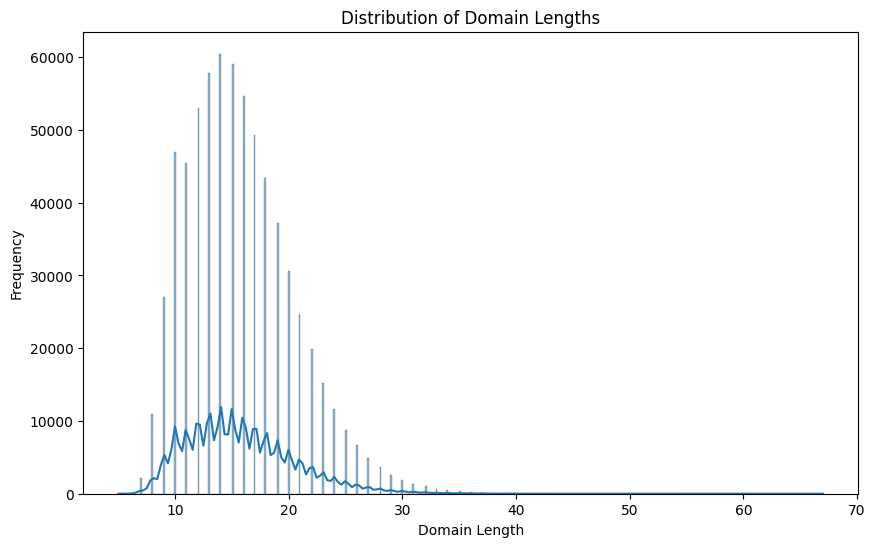

In [12]:
# Histogram for Domain Length
plt.figure(figsize=(10, 6))
sns.histplot(df['domain_length'], kde=True)
plt.title('Distribution of Domain Lengths')
plt.xlabel('Domain Length')
plt.ylabel('Frequency')
plt.show()

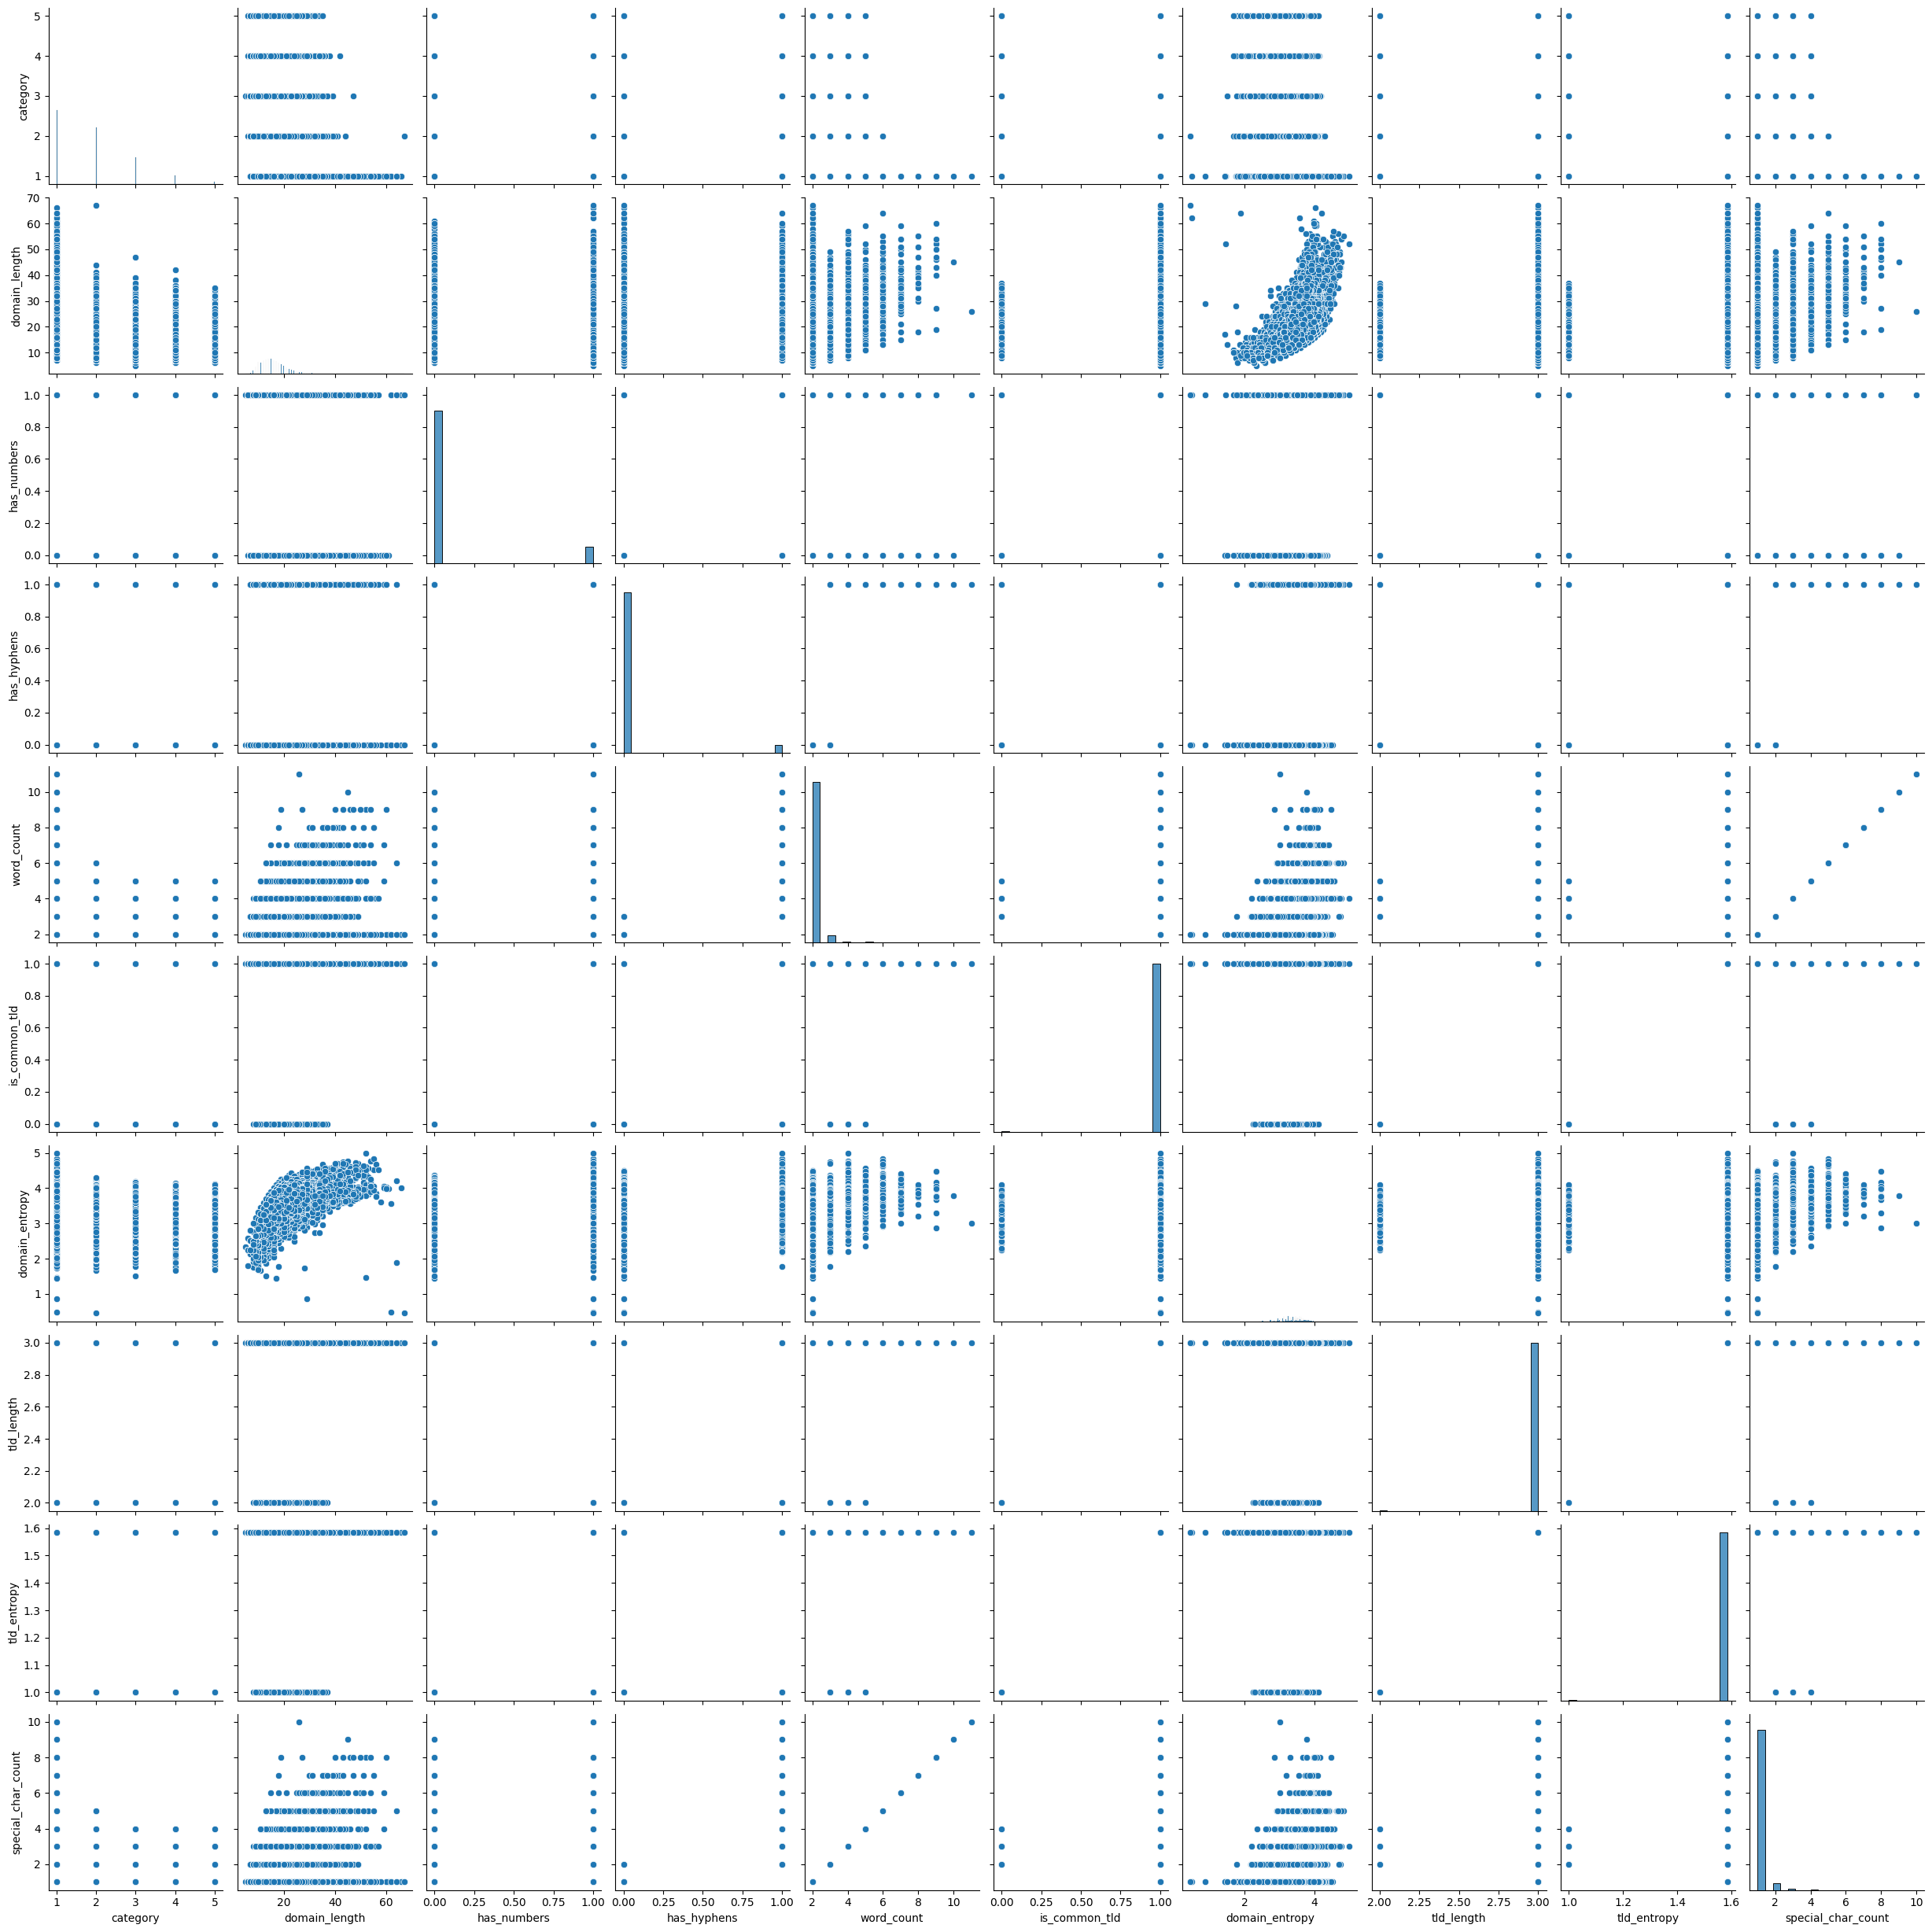

In [13]:
# Pairplot
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()

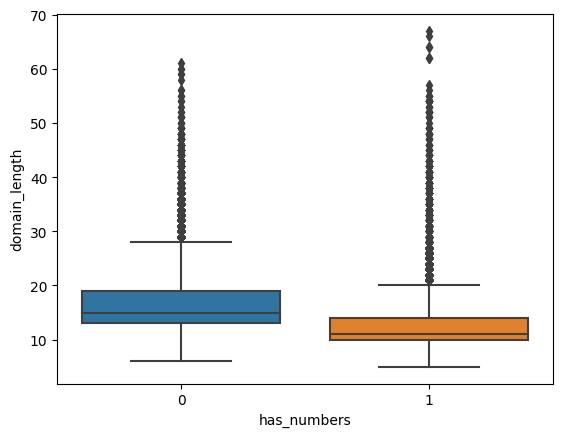

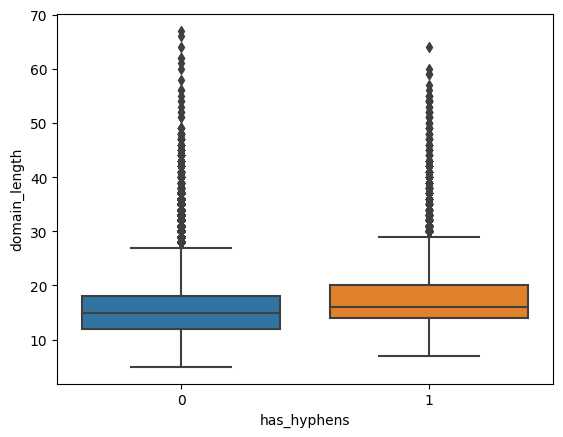

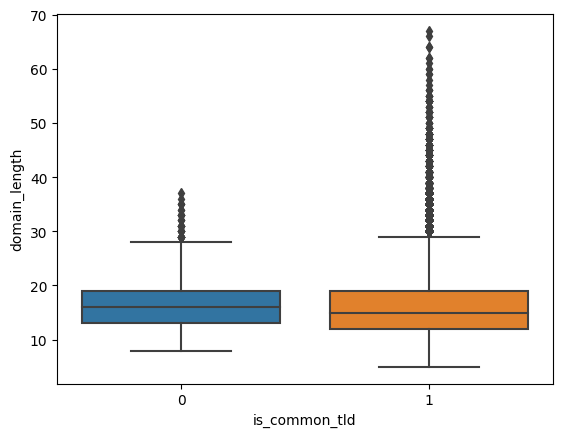

In [14]:
# Boxplot for each categorical feature against a numerical feature
for col in ['has_numbers', 'has_hyphens', 'is_common_tld']:
    sns.boxplot(x=col, y='domain_length', data=df)
    plt.show()

In [15]:
print(df.head())

                   Domain  category  domain_length  has_numbers  has_hyphens  \
0   grapevineplumbing.com         1             21            0            0   
1   willswebsitedemos.com         1             21            0            0   
2      wolfriverpress.com         1             18            0            0   
3  fashionistatoolkit.com         1             22            0            0   
4             407visa.com         1             11            1            0   

   tld  word_count  is_common_tld  domain_entropy  tld_length  tld_entropy  \
0  com           2              1        3.820889           3     1.584963   
1  com           2              1        3.463281           3     1.584963   
2  com           2              1        3.572431           3     1.584963   
3  com           2              1        3.481715           3     1.584963   
4  com           2              1        3.459432           3     1.584963   

   special_char_count  
0                   1  
1 

In [16]:
# Splitting the dataset into training and testing sets
X = df.drop(['Domain', 'category', 'tld'], axis=1)  # Features
y = df['category']  # Target variable

In [17]:
# Encoding the target variable if it's categorical
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [18]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [19]:
def evaluate_model(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, )
    conf_matrix = confusion_matrix(y_test, predictions)

    print(f"Model Performance for {model_name}:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    sns.heatmap(conf_matrix, annot=True)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

Model Performance for Random Forest (Default):
Accuracy: 0.470881778337126
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.63      0.60     59882
           1       0.38      0.58      0.46     46076
           2       0.27      0.00      0.00     21694
           3       0.10      0.00      0.00      6938
           4       0.59      0.04      0.08      2077

    accuracy                           0.47    136667
   macro avg       0.38      0.25      0.23    136667
weighted avg       0.43      0.47      0.42    136667



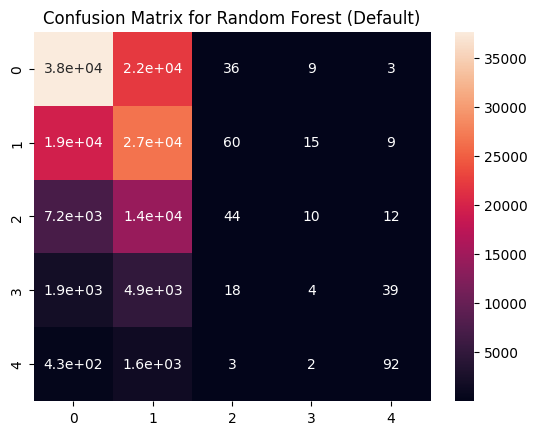

In [20]:
# Random Forest
rf_default = RandomForestClassifier()
rf_default.fit(X_train, y_train)
evaluate_model(rf_default, X_test, y_test, 'Random Forest (Default)')

Model Performance for Gradient Boosting (Default):
Accuracy: 0.4727842127214324
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.61      0.59     59882
           1       0.38      0.60      0.47     46076
           2       0.65      0.00      0.00     21694
           3       0.33      0.00      0.00      6938
           4       0.63      0.04      0.08      2077

    accuracy                           0.47    136667
   macro avg       0.51      0.25      0.23    136667
weighted avg       0.51      0.47      0.42    136667



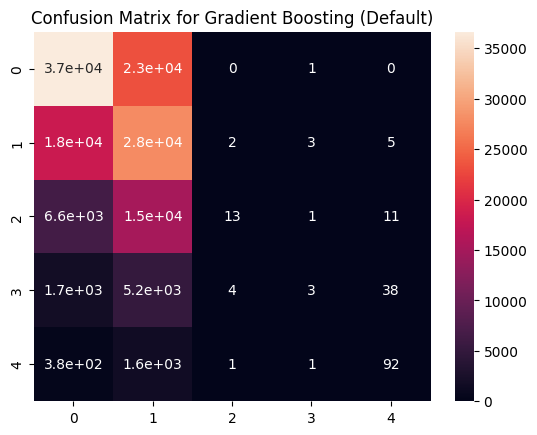

In [21]:
# Gradient Boosting
gbm_default = GradientBoostingClassifier()
gbm_default.fit(X_train, y_train)
evaluate_model(gbm_default, X_test, y_test, 'Gradient Boosting (Default)')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Performance for Naive Bayes (Default):
Accuracy: 0.44034038941368436
Classification Report:
               precision    recall  f1-score   support

           0       0.44      1.00      0.61     59882
           1       0.44      0.01      0.01     46076
           2       0.00      0.00      0.00     21694
           3       0.00      0.00      0.00      6938
           4       0.00      0.00      0.00      2077

    accuracy                           0.44    136667
   macro avg       0.18      0.20      0.12    136667
weighted avg       0.34      0.44      0.27    136667



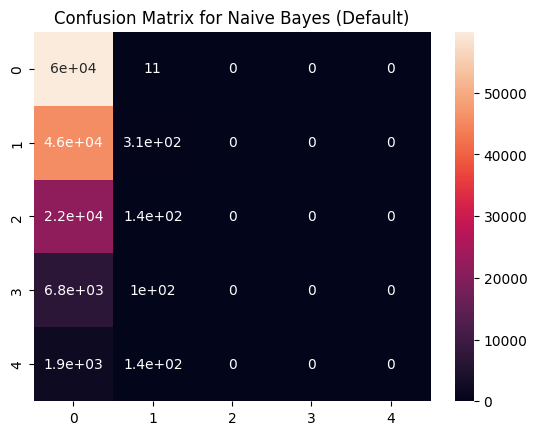

In [22]:
# Naive Bayes
nb_default = MultinomialNB()
nb_default.fit(X_train, y_train)
evaluate_model(nb_default, X_test, y_test, 'Naive Bayes (Default)')

In [26]:
# Define the parameter distribution for RandomForest
rf_param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,2]
}


In [27]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier()

rf_random_search = RandomizedSearchCV(rf, param_distributions=rf_param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, verbose=2)

Model Performance for Random Forest (Tuned):
Accuracy: 0.4727183592235141
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.63      0.60     59882
           1       0.38      0.58      0.46     46076
           2       0.45      0.00      0.00     21694
           3       0.16      0.00      0.00      6938
           4       0.63      0.04      0.08      2077

    accuracy                           0.47    136667
   macro avg       0.44      0.25      0.23    136667
weighted avg       0.47      0.47      0.42    136667



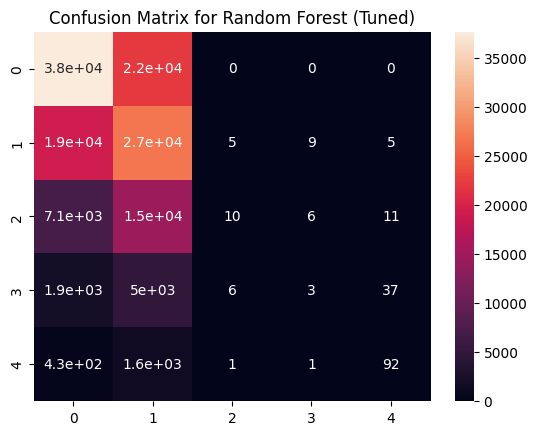

In [28]:
#Random Forest (Tuned)
best_rf = rf_random_search.best_estimator_
evaluate_model(best_rf, X_test, y_test, 'Random Forest (Tuned)')

In [29]:
# Define the parameter distribution for GradientBoosting
gbm_param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5, 7],
}

In [31]:
# Initialize GradientBoostingClassifier
gbm = GradientBoostingClassifier()

gbm_random_search = RandomizedSearchCV(gbm, param_distributions=gbm_param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
gbm_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

Model Performance for Gradient Boosting (Tuned):
Accuracy: 0.4728281150533779
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.62      0.60     59882
           1       0.38      0.59      0.46     46076
           2       0.56      0.00      0.00     21694
           3       0.30      0.00      0.00      6938
           4       0.62      0.04      0.08      2077

    accuracy                           0.47    136667
   macro avg       0.49      0.25      0.23    136667
weighted avg       0.49      0.47      0.42    136667



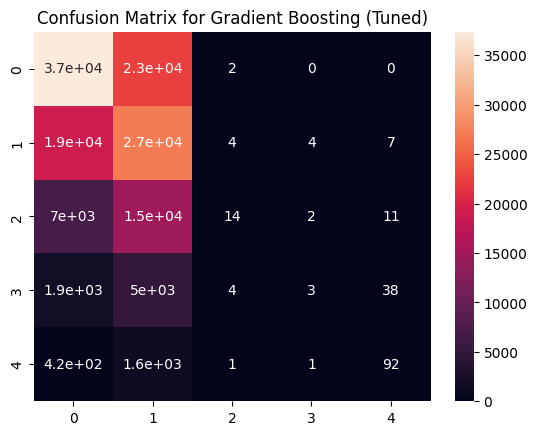

In [32]:
#Gradient Boosting (Tuned)
best_gbm = gbm_random_search.best_estimator_
evaluate_model(best_gbm, X_test, y_test, 'Gradient Boosting (Tuned)')

In [33]:
# Since Naive Bayes doesn't have many hyperparameters to tune, we can use cross-validation to evaluate its performance
nb_scores = cross_val_score(MultinomialNB(), X_train, y_train, cv=5)
print("Average accuracy of Naive Bayes:", nb_scores.mean())

Average accuracy of Naive Bayes: 0.4414257360540733


In [34]:
# Feature Importance Analysis
# Analyzing feature importance from RandomForest and GradientBoosting
feature_importances_rf = pd.Series(rf_default.feature_importances_, index=X.columns)
feature_importances_gbm = pd.Series(gbm_default.feature_importances_, index=X.columns)


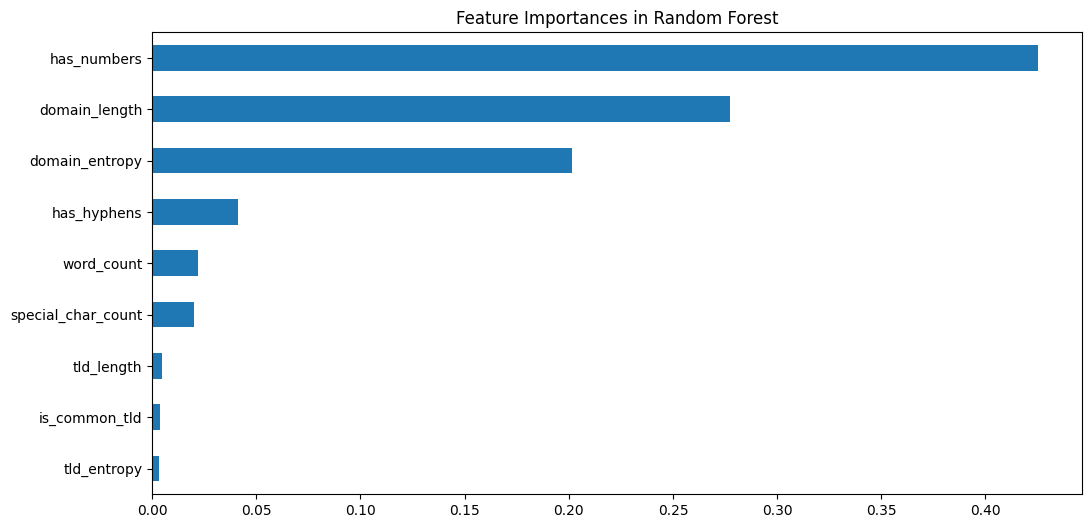

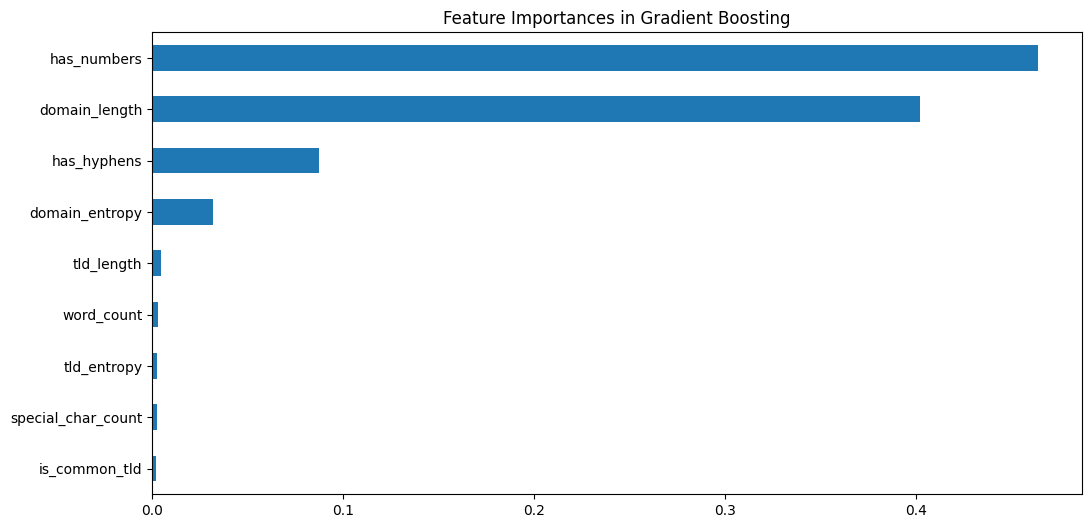

In [35]:
# Plot feature importances
plt.figure(figsize=(12, 6))
feature_importances_rf.sort_values().plot(kind='barh')
plt.title('Feature Importances in Random Forest')
plt.show()

plt.figure(figsize=(12, 6))
feature_importances_gbm.sort_values().plot(kind='barh')
plt.title('Feature Importances in Gradient Boosting')
plt.show()